# Context

Recognizing numbers in photographs is a problem of interest to the Optical Character Recognition community. OCR on multi-character text recognition in photographs is still highly challenging due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.


In this project we will use SVHN dataset, a real-world image dataset obtained from house numbers in Google Street View
images used for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images)


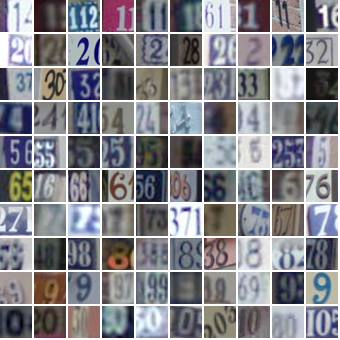

# Objective

Aim of the project is to learn how to implement a simple image classification pipeline based on a Deep Neural Network.

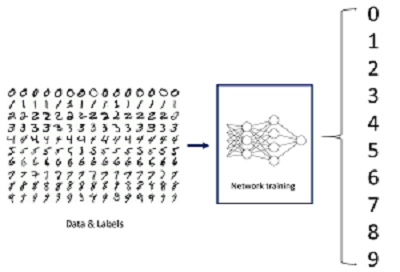

# Coding

In [1]:
## Import necessary python libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
import multiprocessing
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
print('Tensor flow version is: {}'.format(tf.__version__))

Tensor flow version is: 1.15.0


In [2]:
## Keras based on build and compile graphs. Re-run of the graph will club old parameters along with run parameters- 
## which may leads to complexity of graph and unwanted results. Hence graph reset is necessary as below. 
tf.reset_default_graph()
tf.set_random_seed(42)

In [3]:
#path ='C:/Users/Surya-Rekha/Downloads/SVHN_single_grey1.h5'
#hdf = pd.read_hdf(path)
## HDF5 format can be achieved through a package called h5py
hdf5_file = h5py.File('C:/Users/Surya-Rekha/Downloads/SVHN_single_grey1.h5','r')

In [4]:
## Checking keys, values stored in HDFS dataframe
hdf5_file.keys(), hdf5_file.values()

(<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>,
 ValuesViewHDF5(<HDF5 file "SVHN_single_grey1.h5" (mode r)>))

# Load the X_train, X_test, y_train, y_test, X_val and y_val datasets from the h5py file

In [5]:
## Load train, test and validation sets
X_train = hdf5_file["X_train"][:]
X_test = hdf5_file["X_test"][:]
y_train = hdf5_file["y_train"][:]
y_test = hdf5_file["y_test"][:]
X_val = hdf5_file["X_val"][:]
y_val = hdf5_file["y_val"][:]

In [6]:
## Shapes of data frames
print('X_train shape:{}'.format(X_train.shape))
print('X_test set:{}'.format(X_test.shape))
print('X_val shape:{}'.format(X_val.shape))
print('y_train set:{}'.format(y_train.shape))
print('y_test shape:{}'.format(y_test.shape))
print('y_val shape:{}'.format(y_val.shape))

X_train shape:(42000, 32, 32)
X_test set:(18000, 32, 32)
X_val shape:(60000, 32, 32)
y_train set:(42000,)
y_test shape:(18000,)
y_val shape:(60000,)


Closing HDFS file

In [7]:
## Since we got required sets we don't need HDFS file further for manipulations, hence closing the file
hdf5_file.close()

Checking for first image, label in training set

In [8]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [9]:
y_train[0]

2

# Visualization

Visualize the first 10 images, labels in X_train and the corresponding Y_train labels

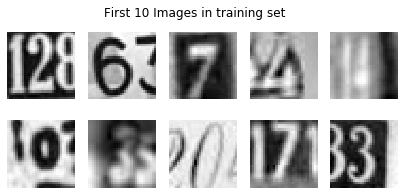

In [10]:
plt.figure(figsize=(7,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.suptitle('First 10 Images in training set \n')
    plt.imshow(X_train[i].reshape(32,32), cmap="gray")
    plt.axis('off')
plt.show()

In [11]:
print('Labels of first row in above plot: %3s' %y_train[0:5])
print('Labels of second row in above plot: %3s' %y_train[5:10])

Labels of first row in above plot: [2 6 7 4 4]
Labels of second row in above plot: [0 3 0 7 3]


# Flatten the images for Keras

Flattening is converting the data into a 1-dimensional array for inputting it to the net layer. 
Here we are going to reduce shape from 3 --> 2 and then 2-->1 in next steps.

For eg., X_train shape is (42000,32,32). We are flattening the matrix to (42000,1024) which is of 2 numbered. 
Image is of 32x32 pixel size, flattened image results 1024 (=32x32) which are input nodes in our first layer of network.

In [12]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))

In [13]:
X_train.shape, X_test.shape, X_val.shape

((42000, 1024), (18000, 1024), (60000, 1024))

# Normalize the inputs for X_train, X_test and X_val

In [14]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)
X_val = preprocessing.normalize(X_val)

In [15]:
# Checking for normalized data in train set
X_train[0]

array([0.01354474, 0.01239371, 0.01099785, ..., 0.02034274, 0.020828  ,
       0.0217228 ], dtype=float32)

# Convert the class matrices y_train, y_test and y_val into one hot vectors

In [16]:
## Converting target to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [17]:
## Checking for first value in y_train
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Print the train, test and val shapes

In [18]:
print('X_train shape:{}'.format(X_train.shape))
print('X_test set:{}'.format(X_test.shape))
print('X_val shape:{}'.format(X_val.shape))
print('y_train set:{}'.format(y_train.shape))
print('y_test shape:{}'.format(y_test.shape))
print('y_val shape:{}'.format(y_val.shape))

X_train shape:(42000, 1024)
X_test set:(18000, 1024)
X_val shape:(60000, 1024)
y_train set:(42000, 10)
y_test shape:(18000, 10)
y_val shape:(60000, 10)


# Neural Network Architecture

I/p layer with 50 nodes--> 1st layer with 50 nodes-->2nd layer with 50 nodes-->3rd layer with 50 nodes-->O/p layer with 10 nodes.

Pass-thru Activation Functions:

For 1 Layer--> Relu

For 2 Layer--> Relu

For 3 Layer--> Relu

For O/p Layer--> Softmax

# Build Graph

# Create a Sequential model in Keras with input layer with the correct input shape, Hidden Layers, Output Layers and the activation functions

In [19]:
## Creating Sequential model
model = Sequential()

In [20]:
## Creating Input layer with 50 nodes
model.add(tf.keras.layers.Dense(50,input_shape=(1024,)))
##model.add(tf.keras.layers.Flatten())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
## Creating First hidden layer with 50 nodes and pass thru activation function is "Relu"
model.add(tf.keras.layers.Dense(50, activation='relu'))

In [22]:
## Creating Second hidden layer with 50 nodes and pass thru activation function is "Relu"
model.add(tf.keras.layers.Dense(50, activation='relu'))

In [23]:
## Creating Third hidden layer with 50 nodes and pass thru activation function is "Relu"
model.add(tf.keras.layers.Dense(50, activation='relu'))

In [24]:
## Creating O/p layer with 10 nodes used for claffication pass thru activation function for this layer is "Softmax"
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Define the optimizer to be used in this model

# Some of the optimizers presented by Keras


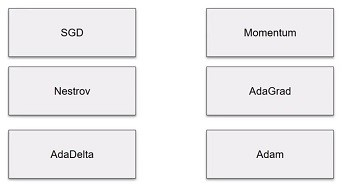

In [25]:
## Defining optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)

# Compile Graph

Compile the model with the corresponding Loss and metrics to monitor

In [26]:
## Compiling model with categorical cross entropy loss and metrics calculation based on accuracy
model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Summarize the model

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                51250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 59,410
Trainable params: 59,410
Non-trainable params: 0
_________________________________________________________________


# Train the model

Fit the model and use model.evaluate() to return the score

In [28]:
## Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 68us/sample - loss: 2.3026 - acc: 0.1035 - val_loss: 2.3026 - val_acc: 0.1010
Epoch 2/10
42000/42000 [==============================] - 3s 61us/sample - loss: 2.3024 - acc: 0.1041 - val_loss: 2.3025 - val_acc: 0.1019
Epoch 3/10
42000/42000 [==============================] - 3s 63us/sample - loss: 2.3023 - acc: 0.1060 - val_loss: 2.3024 - val_acc: 0.0990
Epoch 4/10
42000/42000 [==============================] - 3s 63us/sample - loss: 2.3022 - acc: 0.1032 - val_loss: 2.3023 - val_acc: 0.1018
Epoch 5/10
42000/42000 [==============================] - 3s 64us/sample - loss: 2.3021 - acc: 0.1082 - val_loss: 2.3023 - val_acc: 0.1022
Epoch 6/10
42000/42000 [==============================] - 3s 64us/sample - loss: 2.3021 - acc: 0.1081 - val_loss: 2.3022 - val_acc: 0.1021
Epoch 7/10
42000/42000 [==============================] - 3s 62us/sample - loss: 2.3020 - acc: 0.1074 - val_loss: 2.

In [29]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 0s 26us/sample - loss: 2.3020 - acc: 0.0968


In [30]:
print('Test accuracy is: {} %'.format(round(results[1]*100,3)))

Test accuracy is: 9.683 %


Since SGD has given very low accuracy let's try out with "Adam" Optimizer

In [31]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [32]:
## Fit the model
history = model.fit(X_train, y_train, epochs=10, verbose=1)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 66us/sample - loss: 2.3024 - acc: 0.1027
Epoch 2/10
42000/42000 [==============================] - 3s 63us/sample - loss: 1.9463 - acc: 0.2572
Epoch 3/10
42000/42000 [==============================] - 3s 64us/sample - loss: 1.4859 - acc: 0.4684
Epoch 4/10
42000/42000 [==============================] - 3s 63us/sample - loss: 1.2473 - acc: 0.5862
Epoch 5/10
42000/42000 [==============================] - 3s 62us/sample - loss: 1.1114 - acc: 0.6382
Epoch 6/10
42000/42000 [==============================] - 3s 66us/sample - loss: 1.0283 - acc: 0.6707
Epoch 7/10
42000/42000 [==============================] - 3s 65us/sample - loss: 0.9657 - acc: 0.6930
Epoch 8/10
42000/42000 [==============================] - 3s 65us/sample - loss: 0.9180 - acc: 0.7084
Epoch 9/10
42000/42000 [==============================] - 3s 64us/sample - loss: 0.8744 - acc: 0.7204
Epoch 10/10
42000/42000 [==============================] - 

In [33]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 32us/sample - loss: 0.8442 - acc: 0.7379


In [34]:
print('Test accuracy is: {} %'.format(round(results[1]*100,3)))

Test accuracy is: 73.794 %


# Insight

Insight here is that Adam is performing well than SGD. Let's try to improve accuracy with various regularization techniques

# Batch Normalization

In [35]:
def dnn_bn_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [36]:
## Fit the model
history = model.fit(X_train, y_train, epochs=10, verbose=1)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 65us/sample - loss: 0.8023 - acc: 0.7447
Epoch 2/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.7776 - acc: 0.7536
Epoch 3/10
42000/42000 [==============================] - 3s 64us/sample - loss: 0.7571 - acc: 0.7604
Epoch 4/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.7345 - acc: 0.7667
Epoch 5/10
42000/42000 [==============================] - 3s 62us/sample - loss: 0.7195 - acc: 0.7718
Epoch 6/10
42000/42000 [==============================] - 3s 68us/sample - loss: 0.6949 - acc: 0.7811
Epoch 7/10
42000/42000 [==============================] - 3s 64us/sample - loss: 0.6848 - acc: 0.7838
Epoch 8/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.6653 - acc: 0.7877
Epoch 9/10
42000/42000 [==============================] - 3s 67us/sample - loss: 0.6508 - acc: 0.7928
Epoch 10/10
42000/42000 [==============================] - 

In [37]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 36us/sample - loss: 0.6971 - acc: 0.7863


In [38]:
print('Test accuracy is: {} %'.format(round(results[1]*100,3)))

Test accuracy is: 78.628 %


# Drop out

We will find recordings with Dropout

In [39]:
def do_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [40]:
## Fit the model
history = model.fit(X_train, y_train, epochs=20, verbose=1)

Train on 42000 samples
Epoch 1/20
42000/42000 [==============================] - 3s 63us/sample - loss: 0.6347 - acc: 0.7986
Epoch 2/20
42000/42000 [==============================] - 3s 62us/sample - loss: 0.6153 - acc: 0.8058
Epoch 3/20
42000/42000 [==============================] - 3s 64us/sample - loss: 0.6086 - acc: 0.8069
Epoch 4/20
42000/42000 [==============================] - 3s 63us/sample - loss: 0.5979 - acc: 0.8099
Epoch 5/20
42000/42000 [==============================] - 3s 64us/sample - loss: 0.5895 - acc: 0.8124
Epoch 6/20
42000/42000 [==============================] - 3s 67us/sample - loss: 0.5782 - acc: 0.8158
Epoch 7/20
42000/42000 [==============================] - 3s 69us/sample - loss: 0.5759 - acc: 0.8163
Epoch 8/20
42000/42000 [==============================] - 3s 69us/sample - loss: 0.5672 - acc: 0.8206
Epoch 9/20
42000/42000 [==============================] - 3s 69us/sample - loss: 0.5581 - acc: 0.8236
Epoch 10/20
42000/42000 [==============================] - 

In [41]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 33us/sample - loss: 0.6213 - acc: 0.8136


In [42]:
print('Test accuracy is: {} %'.format(round(results[1]*100,3)))

Test accuracy is: 81.361 %


Insight: Can see good improvement after using Drop out 

# Introducing L2 Regularization

λ = 0.001

In [43]:
def kl_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal',kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal',kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal',kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal',kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal',kernel_regularizer=l2(0.001)))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [44]:
## Fit the model
history = model.fit(X_train, y_train, epochs=10, verbose=1)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.4963 - acc: 0.8411
Epoch 2/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.4928 - acc: 0.8429
Epoch 3/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.4850 - acc: 0.8455
Epoch 4/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.4865 - acc: 0.8441
Epoch 5/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.4874 - acc: 0.8440
Epoch 6/10
42000/42000 [==============================] - 3s 65us/sample - loss: 0.4755 - acc: 0.8476
Epoch 7/10
42000/42000 [==============================] - 3s 64us/sample - loss: 0.4733 - acc: 0.8477
Epoch 8/10
42000/42000 [==============================] - 3s 64us/sample - loss: 0.4762 - acc: 0.8476
Epoch 9/10
42000/42000 [==============================] - 3s 64us/sample - loss: 0.4693 - acc: 0.8500
Epoch 10/10
42000/42000 [==============================] - 

In [45]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 0s 28us/sample - loss: 0.6063 - acc: 0.8220


In [46]:
print('Test accuracy is: {} %'.format(round(results[1]*100,3)))

Test accuracy is: 82.2 %


# Increase the Regularization parameter (Lambda)

λ = 0.01

In [47]:
def kl_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal',kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal',kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal',kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal',kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal',kernel_regularizer=l2(0.01)))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [48]:
## Fit the model
history = model.fit(X_train, y_train, epochs=10, verbose=1)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 65us/sample - loss: 0.4663 - acc: 0.8499
Epoch 2/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.4631 - acc: 0.8514
Epoch 3/10
42000/42000 [==============================] - 3s 62us/sample - loss: 0.4604 - acc: 0.8526
Epoch 4/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.4518 - acc: 0.8562
Epoch 5/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.4545 - acc: 0.8553
Epoch 6/10
42000/42000 [==============================] - 3s 66us/sample - loss: 0.4529 - acc: 0.8566
Epoch 7/10
42000/42000 [==============================] - 3s 69us/sample - loss: 0.4469 - acc: 0.8563
Epoch 8/10
42000/42000 [==============================] - 3s 70us/sample - loss: 0.4481 - acc: 0.8561
Epoch 9/10
42000/42000 [==============================] - 3s 75us/sample - loss: 0.4420 - acc: 0.8583
Epoch 10/10
42000/42000 [==============================] - 

In [49]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 34us/sample - loss: 0.6216 - acc: 0.8195


In [50]:
print('Test accuracy is: {} %'.format(round(results[1]*100,3)))

Test accuracy is: 81.95 %


λ = 0.1

In [51]:
def kl_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal',kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal',kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal',kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal',kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal',kernel_regularizer=l2(0.1)))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [52]:
## Fit the model
history = model.fit(X_train, y_train, epochs=10, verbose=1)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.4391 - acc: 0.8595
Epoch 2/10
42000/42000 [==============================] - 3s 62us/sample - loss: 0.4359 - acc: 0.8606
Epoch 3/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.4311 - acc: 0.8615
Epoch 4/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.4318 - acc: 0.8606
Epoch 5/10
42000/42000 [==============================] - 3s 63us/sample - loss: 0.4334 - acc: 0.8599
Epoch 6/10
42000/42000 [==============================] - 3s 61us/sample - loss: 0.4284 - acc: 0.8619
Epoch 7/10
42000/42000 [==============================] - 3s 62us/sample - loss: 0.4270 - acc: 0.8613
Epoch 8/10
42000/42000 [==============================] - 3s 65us/sample - loss: 0.4222 - acc: 0.8635
Epoch 9/10
42000/42000 [==============================] - 3s 62us/sample - loss: 0.4243 - acc: 0.8633
Epoch 10/10
42000/42000 [==============================] - 

In [53]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 0s 28us/sample - loss: 0.6101 - acc: 0.8245


In [54]:
print('Test accuracy is: {} %'.format(round(results[1]*100,3)))

Test accuracy is: 82.45 %


λ = -0.1

In [56]:
def kl_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal',kernel_regularizer=l2(-0.1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal',kernel_regularizer=l2(-0.1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal',kernel_regularizer=l2(-0.1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal',kernel_regularizer=l2(-0.1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal',kernel_regularizer=l2(-0.1)))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [57]:
## Fit the model
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 73us/sample - loss: 0.4152 - acc: 0.8658 - val_loss: 0.6291 - val_acc: 0.8252
Epoch 2/10
42000/42000 [==============================] - 3s 72us/sample - loss: 0.4154 - acc: 0.8648 - val_loss: 0.6235 - val_acc: 0.8225
Epoch 3/10
42000/42000 [==============================] - 3s 72us/sample - loss: 0.4121 - acc: 0.8680 - val_loss: 0.6206 - val_acc: 0.8241
Epoch 4/10
42000/42000 [==============================] - 3s 72us/sample - loss: 0.4154 - acc: 0.8664 - val_loss: 0.6181 - val_acc: 0.8258
Epoch 5/10
42000/42000 [==============================] - 3s 78us/sample - loss: 0.4100 - acc: 0.8680 - val_loss: 0.6459 - val_acc: 0.8212
Epoch 6/10
42000/42000 [==============================] - 3s 73us/sample - loss: 0.4036 - acc: 0.8701 - val_loss: 0.6059 - val_acc: 0.8312
Epoch 7/10
42000/42000 [==============================] - 3s 72us/sample - loss: 0.4054 - acc: 0.8683 - val_loss: 0.

In [58]:
results = model.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 29us/sample - loss: 0.6586 - acc: 0.8154


In [59]:
print('Test accuracy is: {} %'.format(round(results[1]*100,3)))

Test accuracy is: 81.544 %


Insight: Increasing lambda reduces loss.

# Plotting Loss

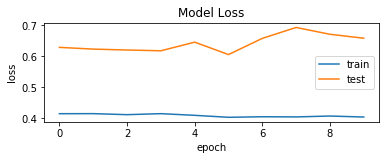

In [60]:
plt.subplot(211)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

Insight: From the plot of loss, we can see that the model has not much comparable performance on both train and validation sets.

# Plotting Accuracy

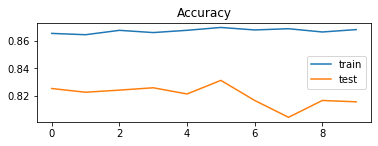

In [61]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

Insight: From the plot of accuracy, we can see that the model perfoms poor for validation set compares with train set.

# Hyper parameter tuning

In [62]:
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [63]:
#input_dim = X_train.shape[1]
#num_classes = 10

#def DL_Model(activation= 'linear', neurons= 5, optimizer='Adam'):
    #model = Sequential()
    #model.add(tf.keras.layers.Dense(neurons, input_dim = input_dim, activation= activation))
    #model.add(tf.keras.layers.Dense(neurons, activation= activation))
    #model.add(tf.keras.layers.Dense(neurons, activation= activation))
    #model.add(Dropout(0.2))
    #model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    #model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    #return model

In [64]:
## Defining Hypertune parameters
#activation= ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
#neurons = [5, 10, 15, 25, 35, 50]
#optimizer = ['SGD', 'Adam', 'Adamax','RMSprop']
#init_mode = ['glorot_uniform', 'uniform'] 
#batches = [128, 512]
#epochs = [10, 20]

In [65]:
#param_grid = dict(neurons = neurons, optimizer = optimizer)

In [66]:
#model = KerasClassifier(build_fn= DL_Model, epochs=80, batch_size=40, verbose=1)

In [67]:
#grid = GridSearchCV(estimator= model, param_grid=param_grid, n_jobs=1, cv=3)

In [68]:
#grid.fit(X_train, y_train)

In [69]:
#print("Max Accuracy registered: {} using {}".format(round(model.best_score_,3), model.best_params_))

In [79]:
input_dim = X_train.shape[1]

def DL_Model(neurons = 5, activation= 'relu', dropout_rate = 0.2, 
             optimizer = 'adam',n_input = 50, n_classes = 10):
    model = Sequential()
    model.add(Dense(neurons, input_dim = n_input, activation = activation))
    model.add(tf.keras.layers.Dense(neurons, activation= activation))
    model.add(tf.keras.layers.Dense(neurons, activation= activation)) 
    model.add(tf.keras.layers.Dense(neurons, activation= activation))
    if dropout_rate:
            model.add(Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))
    
    loss = 'binary_crossentropy'
    if n_classes > 2:
        loss = 'categorical_crossentropy'
    model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
    return model

In [80]:
n_input = X_train.shape[1]
n_classes = 10
keras_model = KerasClassifier(build_fn= DL_Model, n_input = n_input, n_classes = n_classes, verbose=1)

In [81]:
keras_fit_params = {   
    'epochs': 200,
    'batch_size': 2048,
    'validation_data': (X_val, y_val),
    'verbose': 0
}

In [82]:
dropout_rate_opts  = [0, 0.2, 0.5]
#l2_penalty_opts = [0.01, 0.1, 0.5]
activation_opts= ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
neuron_opts = [5, 10, 15, 25, 35, 50]
optimizer_opts = ['SGD', 'Adam', 'Adamax','RMSprop']
#init_mode = ['glorot_uniform', 'uniform'] 

keras_param_options = {
    'neurons': neuron_opts,
    'activation': activation_opts,
    'dropout_rate': dropout_rate_opts,
    'optimizer': optimizer_opts
}

In [87]:
randomcv = RandomizedSearchCV(keras_model, param_distributions = keras_param_options, 
                              scoring = 'neg_log_loss', n_iter = 3, cv = 3, n_jobs = 1, verbose = 1)

In [88]:
randomcv.fit(X_train, y_train)
print('Best score obtained: {0}'.format(randomcv.best_score_))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 28000 samples
14000/14000 [==============================] - 0s 31us/sample
Train on 28000 samples
14000/14000 [==============================] - 0s 34us/sample
Train on 28000 samples
14000/14000 [==============================] - 0s 35us/sample
Train on 28000 samples
14000/14000 [==============================] - 1s 36us/sample
Train on 28000 samples
14000/14000 [==============================] - 1s 37us/sample
Train on 28000 samples
14000/14000 [==============================] - 1s 38us/sample
Train on 28000 samples
14000/14000 [==============================] - 1s 38us/sample
Train on 28000 samples
14000/14000 [==============================] - 1s 40us/sample
Train on 28000 samples
14000/14000 [==============================] - 1s 39us/sample


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   27.8s finished


Train on 42000 samples
42000/42000 [==============================] - 2s 55us/sample - loss: 2.3026 - acc: 0.1032
Best score obtained: -2.302651654016404


In [89]:
print('Parameters:')
for param, value in randomcv.best_params_.items():
    print('\t{}: {}'.format(param, value))

Parameters:
	optimizer: SGD
	neurons: 15
	dropout_rate: 0
	activation: relu


In [90]:
# flatten the one-hot encoded labels for
# acessing prediction accuracy on the test set
from sklearn import metrics
y_true = np.nonzero(y_test)[1]
y_pred = randomcv.predict(X_test)
metrics.accuracy_score(y_true, y_pred)

18000/18000 [==============================] - 1s 40us/sample


0.09694444444444444

In [91]:
print('Classification report:\n')
print(metrics.classification_report(y_true, y_pred))

Classification report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1814
           1       0.00      0.00      0.00      1828
           2       0.04      0.00      0.00      1803
           3       0.10      0.99      0.17      1719
           4       0.00      0.00      0.00      1812
           5       0.00      0.00      0.00      1768
           6       0.00      0.00      0.00      1832
           7       0.38      0.02      0.03      1808
           8       0.00      0.00      0.00      1812
           9       0.00      0.00      0.00      1804

    accuracy                           0.10     18000
   macro avg       0.05      0.10      0.02     18000
weighted avg       0.05      0.10      0.02     18000

